# Feature Scaling

Feature scaling is a technique to standardize the independent features are present in the data in a fixed range 

## Why Feature Scaling ?

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. 
But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, 
this is a problem.

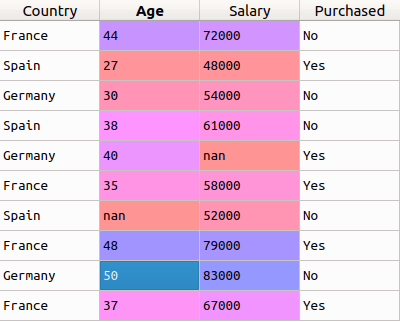

 If a feature in the dataset is big in scale(Salary) compared to other(Age) then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized.
 
If a feature in the dataset is big in scale(Salary) compared to other(Age) then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized.

## Types of Feature Scaling 

**1. Standardization or Z Score Normalization**


**2. Normalization**

## What is Standardization?
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:


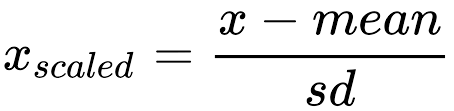

### Lets go and Implement Standardization Feature Scaling in Python

In [3]:
#we have one dataset on gender with their age and their salary and classified by their purchasing power 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv(r"Social_Network_Ads.csv")

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
#we only need age estimated salary and output variable purchased
df = df.iloc[:,2:]

### Lets Split The Data By Train Test Split From Scikit learn 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

### For Standardization We Need To Import Standardscaler

In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

 

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [15]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

#### we can see our data points converted into scaled points  

In [16]:
#converted into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [19]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Lets See Its Graphical Intuation Of Data 

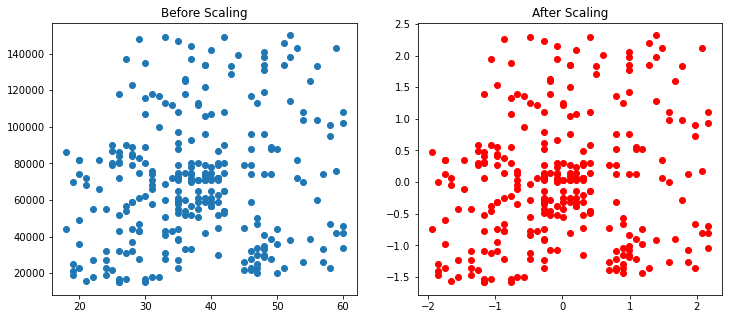

In [14]:
#effect of scaling 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

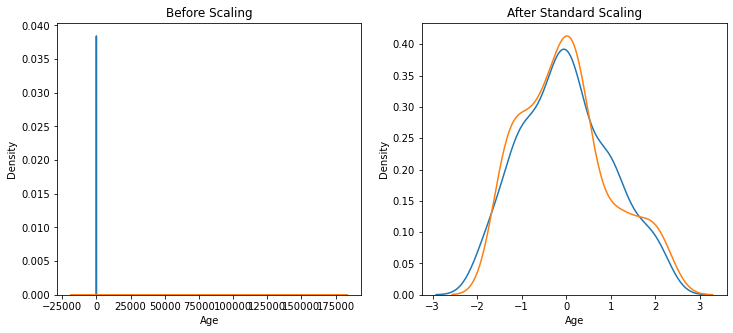

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Comparison of Distributions


<AxesSubplot:title={'center':'Age Distribution After Standard Scaling'}, xlabel='Age', ylabel='Density'>

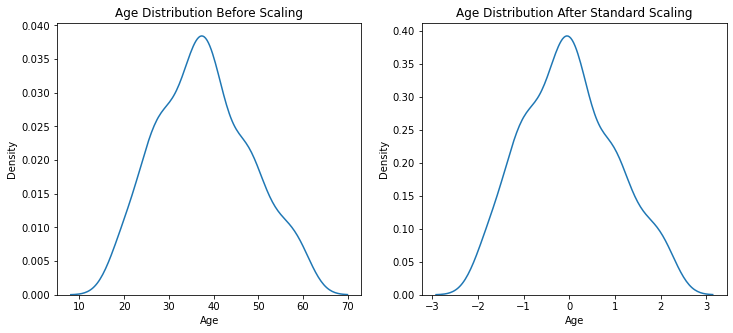

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

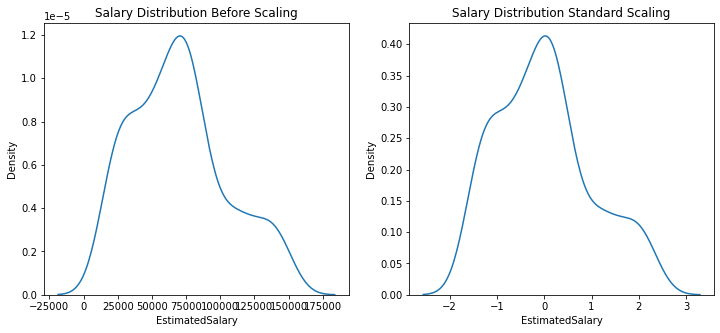

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Example No2: Titanic Dataset

In [21]:
df2 = sns.load_dataset("titanic")
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
df2 =df2[["survived","pclass","age","fare"]]

In [23]:
df2.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


#### from above dataset survived is our output column lets convert them into independent and dependent features 

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [43]:
#age column some Nan values present hence we need to fill them
df2["age"].fillna(df2.age.median(),inplace = True)

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       891 non-null    float64
 3   fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [46]:
#dividing them into x,y
#independent feature
x = df2.iloc[:,1:]
#depended feature 
y =df2.iloc[:,0]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((623, 3), (268, 3))

### StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
scaler.mean_

array([ 2.28731942, 29.54333868, 32.45827255])

In [53]:
X_train

,pclass,age,fare
857,1,51.0,26.5500
52,1,49.0,76.7292
386,3,1.0,46.9000
124,1,54.0,77.2875
578,3,28.0,14.4583
...,...,...,...
835,1,39.0,83.1583
192,3,19.0,7.8542
629,3,28.0,7.7333
559,3,36.0,17.4000


In [54]:
X_train_scaled

array([[-1.5325562 ,  1.64654836, -0.12253019],
       [-1.5325562 ,  1.4930717 ,  0.91812372],
       [ 0.84844757, -2.19036814,  0.29950338],
       ...,
       [ 0.84844757, -0.11843323, -0.51276504],
       [ 0.84844757,  0.49547341, -0.31228976],
       [-0.34205431,  2.33719333,  0.13566725]])

In [55]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [56]:
np.round(X_train.describe(), 1)

,pclass,age,fare
count,623.0,623.0,623.0
mean,2.3,29.5,32.5
std,0.8,13.0,48.3
min,1.0,0.7,0.0
25%,1.5,23.0,7.9
50%,3.0,28.0,15.0
75%,3.0,36.0,31.4
max,3.0,80.0,512.3


In [57]:
np.round(X_train_scaled.describe(), 1)

,pclass,age,fare
count,623.0,623.0,623.0
mean,0.0,0.0,0.0
std,1.0,1.0,1.0
min,-1.5,-2.2,-0.7
25%,-0.9,-0.5,-0.5
50%,0.8,-0.1,-0.4
75%,0.8,0.5,-0.0
max,0.8,3.9,10.0


### Effect of Scaling

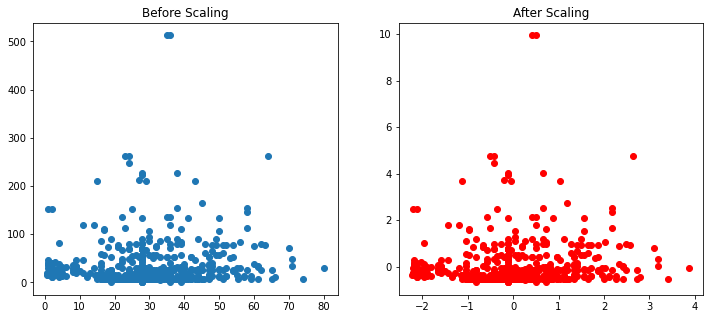

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['age'], X_train['fare'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['age'], X_train_scaled['fare'],color='red')
ax2.set_title("After Scaling")
plt.show()

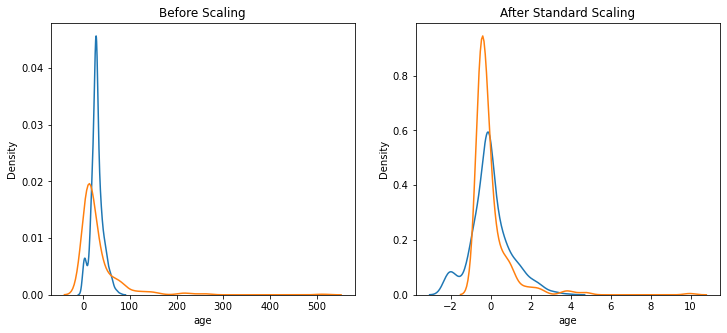

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1)
sns.kdeplot(X_train['fare'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
sns.kdeplot(X_train_scaled['fare'], ax=ax2)
plt.show()

### Comparison of Distributions

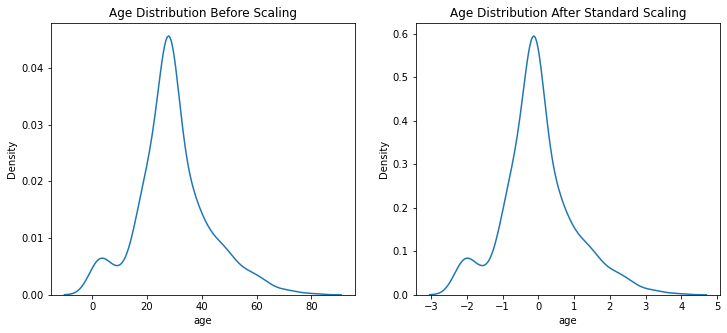

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
plt.show()

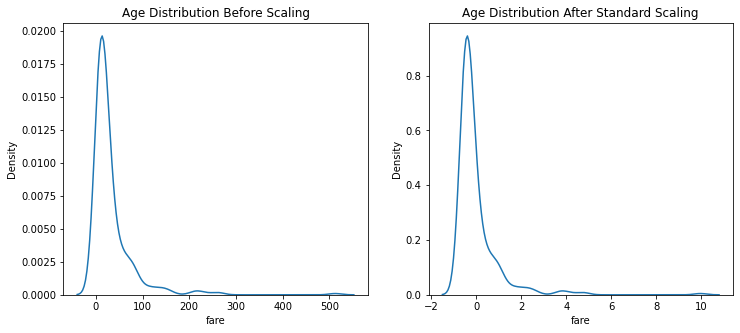

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['fare'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['fare'], ax=ax2)
plt.show()

### What algorithms need feature scaling

 

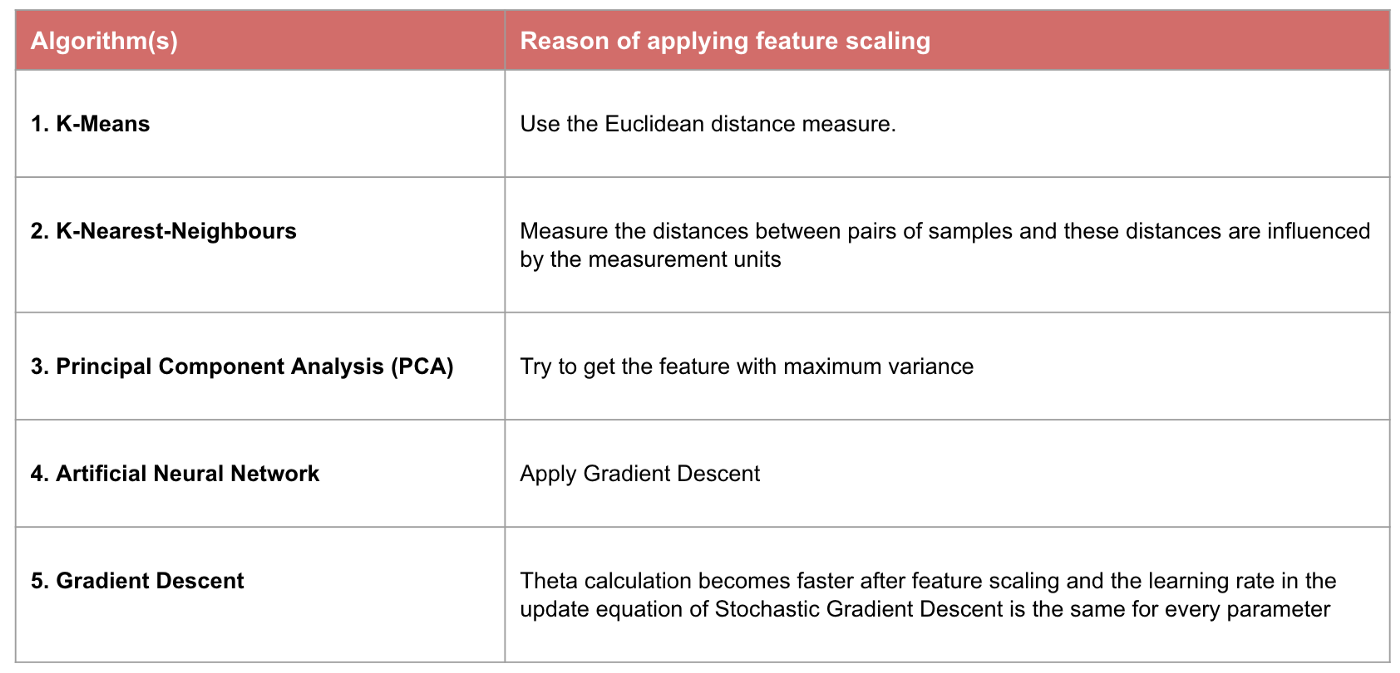